# Elmag Nummerisk Prosjekt - Mikael Bourmistrov

### Løsning av differensiallikninger
### Laplaces Likning og Iterative Metoder
### FY1003 Elektrisitet og Magnetisme - Prosjekt

### Platekondensatorer i Parallell
Denne oppgaven går ut på å undersøke potensial og elektrisk felt for et oppsett med to
platekondensatorer plassert parallelt i en jordet boks (se figur 1 under). Kondensatorene
er holdt ved konstant potensial $V = −1$ (venstre kondensator) og $V = +1$ (høyre kondensator), og er separert med en avstand $d$. Vi antar at tykkelsen på kondensatorene er
neglisjerbar, og at de utstrekker seg fra $y = −0.5$ til $y = 0.5$. For å finne potensialet, og
dermed kunne bestemme det elektriske feltet, må man løse Laplaces likning inne i boksen
med de gitte betingelsene (se NumProg øving 3).

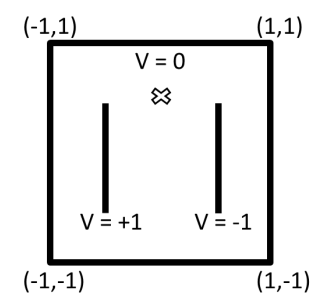

Figure 1: Illustrasjon av oppsettet. Koordinatene for den kvadratiske randen er avmerket
mht. sentrum i boksen. Kryss-symbolet representerer observasjonspunktet brukt i siste
deloppgave.

## Oppgave a)

Løs Laplaces likning for $d = 0.5$ (dvs. kondesatorene plassert i $x = ±0.25$), og plott
potensialet inne i boksen enten som heatmap eller 3d-overflate.

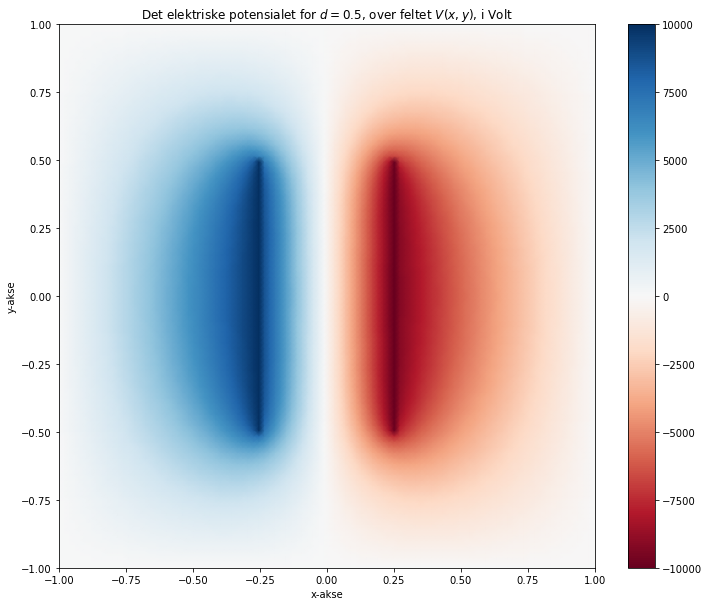

In [3]:
from numpy import meshgrid, linspace, zeros, linalg, gradient, copy, arange
import matplotlib.pyplot as plt
import time

def Gauss_step(V_k, N):
    for i in range(N):
        for j in range(N):
            if (j == 0) or (j == (N-1)) or (i == 0) or (i == (N-1)): 
                V_k[i, j] = V_k[i, j]
                    
            else:
                V_k[i, j] = (1/4) * (V_k[(i-1) % N, j] + V_k[(i+1) % N, j] + V_k[i, (j-1)] + V_k[i, (j+1)])
                
    return V_k

def Gauss_Seidel(V_field, N, tol, rod_update):
    V_k = 0
    V_k_new = Gauss_step(V_field, N)
        
    while linalg.norm(V_k - V_k_new) > tol:
        V_k = copy(V_k_new)
        V_k_new = Gauss_step(V_k_new, N)
        rod_update(V_k_new)
    
    return V_k_new

def rod_update(V_field):
    V_field[ int((N/4)):int((N*(3/4))) , int((N/2)-(N*d/4)) ] = 10000  # Left hand side rod 
    V_field[ int((N/4)):int((N*(3/4))) , int((N/2)+(N*d/4)) ] = -10000 # Right hand side rod 
      
d = 0.5
N = 100
tol = 10**-4

x_space = linspace(-1, 1, N)
y_space = linspace(-1, 1, N)

V_field = zeros((N, N))
rod_update(V_field)
V_k_field = Gauss_Seidel(V_field, N, tol, rod_update)

fig, ax = plt.subplots()
mesh = ax.pcolormesh(x_space, y_space, V_k_field, cmap='RdBu', shading='gouraud')
mesh.figure.set_size_inches(12, 10)
fig.colorbar(mesh, ax=ax)
plt.title(f"Det elektriske potensialet for $d = ${d}, over feltet $V(x,y)$, i Volt" )
plt.xlabel("x-akse")
plt.ylabel("y-akse")
plt.show()

## Oppgave b)

Fra potensialet, finn det elektriske feltet i boksen og plott dette som en quiverplot. $Hint:
Bruk np.gradient$ for å finne gradienten til $V$.

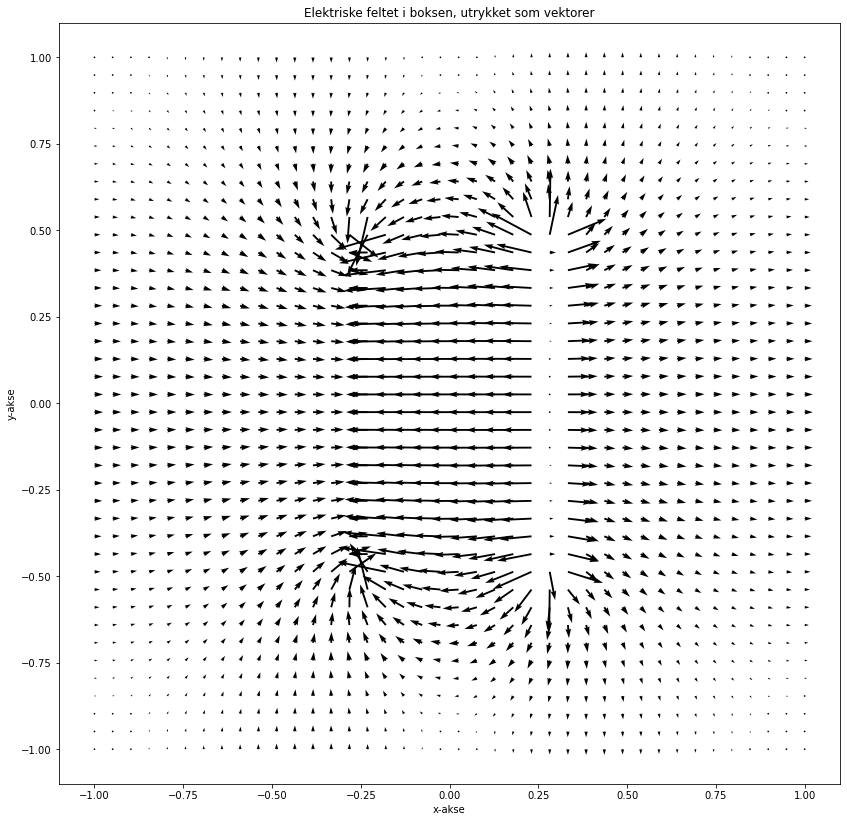

In [2]:
y_vector, x_vector = gradient(V_k_field)

fig, ax = plt.subplots()
plt.title("Elektriske feltet i boksen, utrykket som vektorer")
plt.xlabel("x-akse")
plt.ylabel("y-akse")
q = ax.quiver(x_space, y_space , x_vector, y_vector)
q.figure.set_size_inches(14, 14)
plt.show()

## Oppgave c)

Plott den elektriske feltstyrken i punktet (0, 0.6) som funksjon av plateseparasjon $d$.

<Figure size 432x288 with 0 Axes>

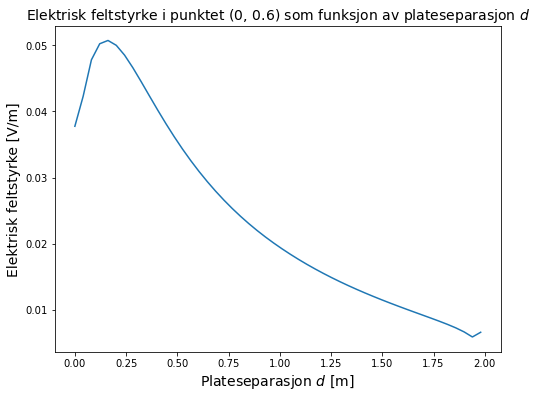

In [4]:
New_N = N//2 # Seems like using this value for plotting fixes an issue i had with the rounding and plotting

E_point_list = zeros(New_N)
index_list = arange(New_N)
d_list = linspace(0, 2 - 2/N, New_N)
    
x_coordinate = N//2   # The x-coordinate in index form, makes the code easier and prettier. The value comes from x = 0, where the index for 0 is half of all indexes.
y_coordinate = 4*N//5 # The y-coordinate in index form, makes the code easier and prettier. The value comes from y = 0.6, where we need the index for 0 (half way) and add 0.6: N/2 + 0.6 * N/2 = 4N/5.

for i, d in zip(index_list, d_list):
    y_vector, x_vector = gradient(Gauss_Seidel(V_field, N, tol, rod_update))
    E_point_list[i] = linalg.norm((x_vector[y_coordinate, x_coordinate], y_vector[y_coordinate, x_coordinate])) # Yes x and y are on the opposite sides than what were used to calculate with.
    
plt.figure(0)
plt.figure(figsize=(8,6))
plt.plot(d_list, E_point_list)
plt.title('Elektrisk feltstyrke i punktet (0, 0.6) som funksjon av plateseparasjon $d$', fontsize=14)
plt.xlabel('Plateseparasjon $d$ [m]', fontsize=14)
plt.ylabel('Elektrisk feltstyrke [V/m]', fontsize=14)
plt.show()